3.4

classification example ( movie review )

get data

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
print(len(train_data),  len(train_labels), len(test_data), len(test_labels))
print()
print("max length of sequance: ", max([len(seq) for seq in train_data] ) )
print()
print("train data sampling:\n", train_data[0])
print()
print("label:", train_labels)
print()

# check max index of words
max([max(seq) for seq in train_data])

25000 25000 25000 25000

max length of sequance:  2494

train data sampling:
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5

9999

convert to original words (just test)

In [3]:
word_index = imdb.get_word_index()
word_index

reverse_word_index = dict( [(value, key) for (key, value) in word_index.items() ] )
decoded_review = ' '.join( [reverse_word_index.get(i-3, '?') for i in train_data[0]] )
decoded_review



"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

reday for data
- we cant inject numeric list to NN. so need to change list to tensor.
- there are two ways to make change.
- first method is `Embedding`
- second method is `One-hot encoding`
- in this section, we will use One-hot encoding

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다        
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
# vectorize label

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
train_num = len(train_data)
test_num = len(train_data)

train_num

25000

make NN model

In [8]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )) )
model.add(layers.Dense(16, activation='relu') )
model.add(layers.Dense(1, activation='sigmoid') )

Instructions for updating:
Colocations handled automatically by placer.


prepare validation set

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

network compile
- optimizer나 loss, metrics 등을 custom 가능함.

In [10]:
from keras import losses
from keras import metrics

# use function
model.compile(optimizer=optimizers.RMSprop(),
                loss=losses.binary_crossentropy,
                metrics=[metrics.binary_accuracy]
               )

training network

In [11]:
hist = model.fit(partial_x_train, partial_y_train, 
                   batch_size=512, 
                   epochs=20,
                   validation_data=(x_val, y_val)
                  )

result = model.evaluate(x_test, y_test)
result

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3085 - val_binary_accuracy: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2840 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 45us/step - loss: 0.1150 - binary_ac

[0.7697100537014008, 0.8496]

check `history` object

In [12]:
history_dict = hist.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

draw cost graph (train, val)

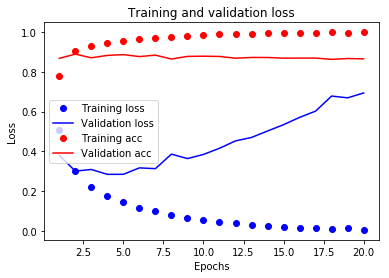

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = hist.history['binary_accuracy']
val_acc = hist.history['val_binary_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


try make model again

In [40]:
from keras import *

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000, )) )
model.add(layers.Dense(32, activation='relu') )
model.add(layers.Dense(1, activation=activations.sigmoid) )

# use function
model.compile(optimizer=optimizers.RMSprop(),
                loss=losses.binary_crossentropy,
#                 loss=losses.mse,
                metrics=[metrics.binary_accuracy]
               )

# learning
tb_hist = callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)

hist = model.fit(partial_x_train, partial_y_train, 
                    batch_size=512, 
                    epochs=20,
                    validation_data=(x_val, y_val),
                     callbacks=[tb_hist]                 
                  )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.4994 - binary_accuracy: 0.7931 - val_loss: 0.3743 - val_binary_accuracy: 0.8533
Epoch 2/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.2823 - binary_accuracy: 0.9031 - val_loss: 0.2954 - val_binary_accuracy: 0.8841
Epoch 3/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.2010 - binary_accuracy: 0.9320 - val_loss: 0.2850 - val_binary_accuracy: 0.8848
Epoch 4/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1649 - binary_accuracy: 0.9425 - val_loss: 0.2961 - val_binary_accuracy: 0.8831
Epoch 5/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1289 - binary_accuracy: 0.9581 - val_loss: 0.2947 - val_binary_accuracy: 0.8864
Epoch 6/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0993 - binary_accuracy: 0.9694 - val_loss: 0.3178 - val_binary_a

evaluation

In [41]:
result = model.evaluate(x_test, y_test)
result

25000/25000 [==============================] - 1s 36us/step


[0.8032331877589226, 0.85072]

prediction

In [42]:
model.predict(x_test)

array([[0.00287184],
       [1.        ],
       [0.9990162 ],
       ...,
       [0.00210246],
       [0.00599828],
       [0.9683942 ]], dtype=float32)

tensorboard 연동

In [49]:
!pip install -q tensorboard

In [51]:
%%bash --bg -s
nohup tensorboard --logdir="/home/boom109/workspace/keras-books-notebooks/soonhyung_notebooks/graph" 2>&1

In [45]:
import webbrowser
webbrowser.open("http://0.0.0.0:6006")

True